# Class 2 - Classifiers evaluation

### Import needed modules

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [25]:
plt.style.use('seaborn-white') #changing plot style
plt.rcParams['figure.dpi']=90.0 #size of figures

In [26]:
from sklearn.neighbors import KernelDensity
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## 1. Splitting dataset into train and validation subsets (german data)

**Data loading & pre-processing**

In [27]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric"
DATA_SET = pd.read_fwf(url, header = None)
DATA_SET.rename(columns = {24: "target"}, inplace=True)
DATA_SET['target'] = DATA_SET['target'] - 1 #recoding target variable
DATA_SET

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,target
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,0
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,1
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,0
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,0
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,12,2,17,1,4,2,4,1,31,...,0,0,1,0,0,1,0,1,0,0
996,1,30,2,39,1,3,1,4,2,40,...,0,1,1,0,0,1,0,0,0,0
997,4,12,2,8,1,5,3,4,3,38,...,0,0,1,0,0,1,0,0,1,0
998,1,45,2,18,1,3,3,4,4,23,...,0,0,1,0,0,0,0,0,1,1


In [28]:
X = DATA_SET.drop(['target'], axis=1)
y = DATA_SET['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1) # dzielimy nasz dataset na zbiór treningowy i walidacyjny (nie sugerować się nazwami. funkcja dlatego że jest dedykowana dla podziału
# na treningowy i testowy, ale i guess działa tak samo; nazwy głupie imo )

In [29]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(700, 24) (300, 24)
(700,) (300,)


Is random sampling the best approach? What if one class has many more records than the other?
Imbalanced data may lead to poor model which may have good overall performance metrics e.g. accuracy.

There are several approaches to tackle the issue:
- undersampling, 
- oversampling,
- cost-based performance,
- algorithmic approches e.g.SMOTE (Synthetic Minority Oversampling Technique)

Quick reading with code samples:
[Article on imbalanced data in Python](https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18)

Most machine learning algorithms work best when the number of samples in each class are about equal. This is because most algorithms are designed to maximize accuracy and reduce error.

Oversampling can be defined as adding more copies of the minority class ; resampling module from Scikit-Learn can be used to randomly replicate samples from the minority class.<br> Always split into test and train sets BEFORE trying oversampling techniques!

Undersampling can be defined as removing some observations of the majority class; available the resampling module from Scikit-Learn to randomly remove samples from the majority class.

SMOTE - A technique similar to upsampling is to create synthetic samples. SMOTE uses a nearest neighbors algorithm to generate new and synthetic data we can use for training our model. <br> Again, it’s important to generate the new samples only in the training set to ensure our model generalizes well to unseen data.

**Cost-based approach in model assessment**

In [30]:
np.arange(0, 1.0, 0.01) 

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

???

In [31]:
# (?) definiujemy funkcję, dzięki której dla każdego punktu odcięcia 
# (momentu, od którego funkcja logistyczna ma klasyfikować jako 1), będziemy mogli obliczyć funkcję kosztu (???)

def cutoff_analysis(y_test: pd.Series, y_test_hat: pd.Series, cost_matrix: np.array = np.array([[0,0],[0,0]]) ) -> list:
    """
    Calculate accuracy vector for cutoff thresholds between 0 and 1 for given true labels `y_test` 
    and predicted labels `y_test_hat`. If `cost_matrix` is specified, calculates cost vector instead.
    """
    cutoff_range = np.arange(0, 1.0, 0.01) # zwraca arrayliczb z przedziału [0, 1) różniących się o 0.01
    vec = []
    
    for cutoff in cutoff_range:
        y_test_hat_bin = np.where(y_test_hat >= cutoff, 1, 0) # jeśli prawda zwróć 1, jeśli nieprawda 0 # (dokładnie to będzie robiła pózniej regresja logistyczna dla wybranego cutoffu);
                                                                # czyli tak jakby pokazuje klasyfikacje, jaka by się zadziała 
        conf_mat = confusion_matrix(y_test, y_test_hat_bin)
        #no cost matrix, calculate accuracy
        if np.sum(cost_matrix) == 0:
            vec.append(np.sum(np.diag(conf_mat)) / np.sum(conf_mat))
        else:
            conf_const_mat = np.multiply(conf_mat, cost_matrix)
            vec.append(conf_const_mat.sum() / len(y_test))
    return vec

**Building logistic regression model**

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/320px-Logistic-curve.svg.png" align="left">

https://en.wikipedia.org/wiki/Logistic_regression

https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

In [32]:
model = LogisticRegression(max_iter=10000)
LR_L1 = model.fit(X_train,y_train) # uczymy model 

In [33]:
LR_L1.coef_ # takie otrzymalismy współczynniki regresji 

array([[-0.50080593,  0.0365248 , -0.52733018,  0.00574951, -0.22722224,
        -0.13639384, -0.23754075,  0.08286093,  0.16031643, -0.01740347,
        -0.25239757,  0.38945687,  0.08418567, -0.34494572, -0.75466871,
         0.65954654, -0.99231248,  0.64885961,  1.03315393,  0.32192751,
        -0.08358807, -0.67569875,  0.07644169, -0.11693842]])

regresja logistyczna opiera się na funkcji prawdopodobieństwa <br>
<img src= "https://wikimedia.org/api/rest_v1/media/math/render/svg/83175b453c5fe1104b867f6b9e25f4628f851778"><br>
mając obliczone współczynniki regresji, dla każdego wiersza jesteśmy w stanie obliczyć prawdopodobieństwo

Once fitted, the predict_proba method of LogisticRegression predicts the probability of the positive class (czyli szacuje prawdopodobieństwo przynależności obiektu do klasy pozytywnej, tzn. 1 P(y_i = 1 |X_i). Domyślnie jeśli jest ono większe niż 0.5, klasyfikuje jako 1.

**Measuring model performance (cost-based) for different cutoof thresholds and with or without validation dataset**

In [13]:
#On validation data
score_val = LR_L1.predict_proba(X_test)[:,1] # przewidujemy prawdopodobieństwo dla każdej z danych testowych
#On training data
score_train = LR_L1.predict_proba(X_train)[:,1] # przewidujemy prawdopodobieństwo dla każdej z danych treningowych

In [34]:
score_val.size

300

In [35]:
score_train.size

700

In [36]:
costmat = np.array([[0,1],[5,0]])
costmat

array([[0, 1],
       [5, 0]])

In [37]:
# liczymy jakie mamy wartości funkcji kosztu w zależności od tego, jaki wybierzemy cutoff point (punkt, od którego klasyfikujemy jako 1)
cost_val = cutoff_analysis(y_test, score_val, cost_matrix = costmat) 
cost_train = cutoff_analysis(y_train, score_train, cost_matrix = costmat)

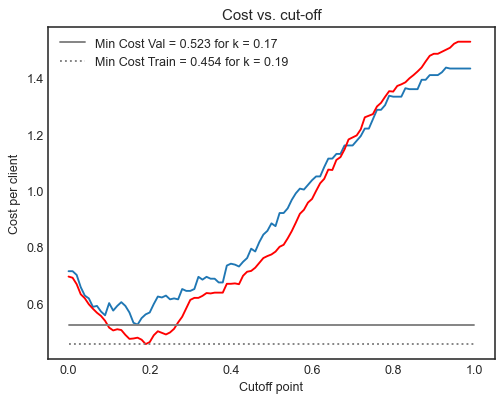

In [23]:
plt.figure()
plt.xlabel("Cutoff point")
plt.ylabel("Cost per client")
plt.title("Cost vs. cut-off")

plt.plot(np.arange(0, 1.0, 0.01), cost_val)
plt.plot(np.arange(0, 1.0, 0.01), cost_train, color = "red")
plt.plot([0, 1], [min(cost_val), min(cost_val)], color = 'gray', label = "Min Cost Val = " + \
         str(round(min(cost_val),3)) + " for k = " + str(round(np.arange(0, 1.0, 0.01)[cost_val.index(min(cost_val))],2)))
plt.plot([0, 1], [min(cost_train), min(cost_train)], color = 'gray', linestyle = ":", label = "Min Cost Train = " + \
         str(round(min(cost_train),3)) + " for k = " + str(np.arange(0, 1.0, 0.01)[cost_train.index(min(cost_train))]))

plt.legend();

Czyli wychodzi że najniższa wartosc funkcji kosztu  dla zbioru walidacyjnego jest gdy cutoff point = 0.17; <br>
dla treningowego gdy 0.19

Looks like we got lower cost for predictions on training set, but model may **overfit**.


## 2. Assessing model performance (australian data)

In [42]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/australian/australian.dat"
dataset = pd.read_csv(url, sep = " ", header = None)
dataset.columns = ["V" + str(i) for i in range(0,15)]
dataset.rename(columns = {"V14": "class"}, inplace = True)
dataset.head()


,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,class
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [43]:
# oryginalnie V3 oraz V11 zawierało 1, 2, 3
dataset['V3'] = np.where(dataset['V3'] == 1, 0, 1)
dataset['V11'] = np.where(dataset['V11'] == 1, 0, 1)
dataset['V13'] = np.log(dataset['V13']) # logarytm naturalny
dataset

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,class
0,1,22.08,11.460,1,4,4,1.585,0,0,0,1,1,100,7.100852,0
1,0,22.67,7.000,1,8,4,0.165,0,0,0,0,1,160,0.000000,0
2,0,29.58,1.750,0,4,4,1.250,0,0,0,1,1,280,0.000000,0
3,0,21.67,11.500,0,5,3,0.000,1,1,11,1,1,0,0.000000,1
4,1,20.17,8.170,1,6,4,1.960,1,1,14,0,1,60,5.068904,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,31.57,10.500,1,14,4,6.500,1,0,0,0,1,0,0.000000,1
686,1,20.67,0.415,1,8,4,0.125,0,0,0,0,1,0,3.806662,0
687,0,18.83,9.540,1,6,4,0.085,1,0,0,0,1,100,0.000000,1
688,0,27.42,14.500,1,14,8,3.085,1,1,1,0,1,120,2.484907,1


**Data split using sklearn**

In [44]:
training_fraction = 0.8
X = dataset.iloc[:, 0:14]
y = dataset.iloc[:, 14]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-training_fraction, random_state = 42)

**Logistic Regression estimation with L1 regularization(LASSO)**

W metodzie Lasso do funkcji kosztu dodawany jest człon regularyzacyjny -suma wartosci bezwzględnych wag (dzięki czemu model będzie starał się nie wybierać wag bardzo dalekich od 0, a więć zapobiegamy overfittingowi (?))

In [45]:
model_log_reg = LogisticRegression(random_state = 42, solver = 'liblinear', penalty = 'l1') # wybieramy postać modelu (regularyzując L1, lasso)
model_log_reg_fit = model_log_reg.fit(X_train,y_train) # uczymy model na naszych danych 

**L1 regularization allows for feature selection**

https://en.wikipedia.org/wiki/Lasso_(statistics)

Lasso = L1 on linear regression
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/6f7b5020a85afe0ca7e4ac1bcda7d193bc812617)

In [46]:
model_log_reg_fit.coef_
#First coefficient is 0

array([[ 0.00000000e+00, -1.69462721e-02,  2.67751516e-03,
         7.34979539e-01,  2.09638469e-01, -3.32111031e-02,
         6.70704904e-02,  3.37556531e+00,  1.24064299e-02,
         1.72077009e-01, -2.82741877e-01, -5.59812282e-01,
        -1.95258002e-03,  1.55889403e-01]])

In [47]:
y_test_hat = model_log_reg.predict(X_test)

**Confusion matrix**

❗ Remember class indicator (0, 1,...) and actual or predicted values may be switched in confusion matrix

<img src="https://miro.medium.com/max/712/1*Z54JgbS4DUwWSknhDCvNTQ.png" width=400>

<img src="https://miro.medium.com/max/1780/1*LQ1YMKBlbDhH9K6Ujz8QTw.jpeg"  width=400>

**Performance measures derived from confusion matrix:**

- Accuracy - percentage of correct predictions

`ACC = (TP + TN)/(TP + FP + TN + FN)`

- Precision - percentage of positive predictions which were actually correct

`PREC = TP / (TP + FP)`

-  Recall - what percentage of actual positives were predicted correctly
 (Recall = Sensitivity = Hit rate = True Positive Rate (TPR))
 
`REC = TP / (TP + FN)`

- Specificity - what percentage of actual negatives were predicted correctly (Specificity = True Negative Rate)

`TNR = TN / (TN + FP)`

- F1 Score - traditional F-measure or balanced F-score (F1 score) is the harmonic mean of precision and recall

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/1bf179c30b00db201ce1895d88fe2915d58e6bfd)

In [48]:
confm = confusion_matrix(y_test, y_test_hat)
confm #nasza macierz błedu

array([[78,  9],
       [10, 41]], dtype=int64)

In [49]:
#What is what in that confusion matrix?
confusion_matrix?

Signature:
confusion_matrix(
    y_true,
    y_pred,
    *,
    labels=None,
    sample_weight=None,
    normalize=None,
)
Docstring:
Compute confusion matrix to evaluate the accuracy of a classification.

By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
is equal to the number of observations known to be in group :math:`i` and
predicted to be in group :math:`j`.

Thus in binary classification, the count of true negatives is
:math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
:math:`C_{1,1}` and false positives is :math:`C_{0,1}`.

Read more in the :ref:`User Guide <confusion_matrix>`.

Parameters
----------
y_true : array-like of shape (n_samples,)
    Ground truth (correct) target values.

y_pred : array-like of shape (n_samples,)
    Estimated targets as returned by a classifier.

labels : array-like of shape (n_classes), default=None
    List of labels to index the matrix. This may be used to reorder
    or select a subset of labels.
    If

In [50]:
ACC= (confm[0,0]+confm[1,1])/(confm[0,0]+confm[1,1]+confm[0,1]+confm[1,0])
PREC = (confm[1,1])/(confm[1,1]+confm[0,1])
REC = (confm[1,1])/(confm[1,1]+confm[1,0])
TNR = (confm[0,0])/(confm[0,0]+confm[0,1])
F1 = 2*PREC*REC/(PREC+REC)
print("ACC ",ACC,"\nPREC ",PREC,"\nREC ",REC,"\nTNR ",TNR,"\nF1 ",F1)

ACC  0.8623188405797102 
PREC  0.82 
REC  0.803921568627451 
TNR  0.896551724137931 
F1  0.8118811881188118


In [51]:
#Sklearn built-in report
print(classification_report(y_test,y_test_hat))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89        87
           1       0.82      0.80      0.81        51

    accuracy                           0.86       138
   macro avg       0.85      0.85      0.85       138
weighted avg       0.86      0.86      0.86       138



**Finding optimal cut-off based on ACC**

In [52]:
y_test_hat = model_log_reg.predict_proba(X_test)[:,1]
y_train_hat = model_log_reg.predict_proba(X_train)[:,1]
acc_k = cutoff_analysis(y_test, y_test_hat) # na zbiorze testowym

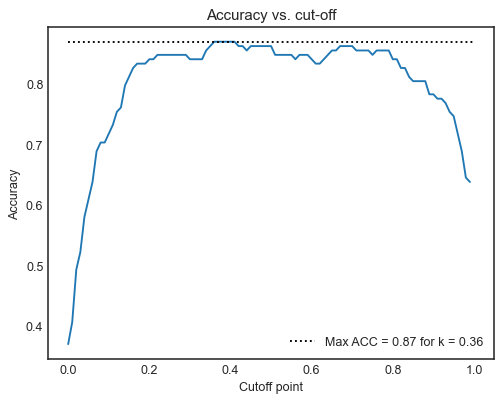

In [53]:
plt.figure()
plt.xlabel("Cutoff point")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. cut-off")

plt.plot(np.arange(0, 1.0, 0.01), acc_k)
plt.plot([0, 1], [max(acc_k), max(acc_k)], color = 'black', linestyle = ":", label = "Max ACC = " + \
         str(round(max(acc_k),3)) + " for k = " + str(np.arange(0, 1.0, 0.01)[acc_k.index(max(acc_k))]))
plt.legend();

### Visual analysis of a model

**Gain&Lift&ROC curves**

In [75]:
def gain_lift_roc_plot(y_test: pd.Series, y_test_hat: pd.Series, return_chart: str, n: int):
    """
    Produces Gain, Lift or ROC curve based on provided `y_test` true labels and `y_test_hat` prediction labels. 
    Wizard and Random models are added for comparison.
    """
    cutoff_range = np.arange(0, 1.0, 0.01)
    rpp = [0]*len(cutoff_range)
    tpr = rpp.copy()
    lift = rpp.copy()
    fpr = rpp.copy()
    prc = rpp.copy()
    x0 = np.mean(y_test)
    plt.subplot(2, 2, n) # n jest miejscem, na którym znajdzie się wykres
    
    for i, cutoff in enumerate(cutoff_range):
        y_test_hat_bin = np.where(y_test_hat >= cutoff, 1, 0)
        conf_mat = confusion_matrix(y_test, y_test_hat_bin)
        rpp[i] = np.sum(conf_mat[:,1]) / np.sum(conf_mat)   # (TN + FN)/ everything
        fpr[i] = conf_mat[0,1] / np.sum(conf_mat[0,:])      # FP/ (TN+FP) [so all real negatives]
        tpr[i] = conf_mat[1,1] / np.sum(conf_mat[1,:])      # TP/ (FN+ TP) [so all real positives]
        prc[i] = conf_mat[1,1] / np.sum(conf_mat[:,1])      # TP / (FP + TP) [ czyli przez wszystkie pozytywne przeiwdziane przez model - precision]
        lift[i] = tpr[i] / rpp[i]                           # [TP/ (FN+ TP)] / [(TN + FN)/ everything]
        
    # chyba to samo dokladnie co powyzej
    
    # for i, cutoff in enumerate(cutoff_range):
    #     y_test_hat_bin = np.where(y_test_hat >= cutoff, 1, 0)
    #     conf_mat = confusion_matrix(y_test, y_test_hat_bin)
    #     rpp[i] = np.sum(conf_mat[:,1]) / np.sum(conf_mat)
    #     fpr[i] = conf_mat[0,1] / np.sum(conf_mat[0,:])
    #     tpr[i] = conf_mat[1,1] / np.sum(conf_mat[1,:])
    #     prc[i] = conf_mat[1,1] / np.sum(conf_mat[:,1])
    #     lift[i] = tpr[i] / rpp[i]
    if return_chart == "gain":
        plt.xlabel("Rate of Positive Predictions")
        plt.ylabel("True Positive Rate")
        plt.plot(rpp, tpr, color="orange", label = "Model")
        plt.plot([0,1],[0,1], color='grey', linestyle="--", label = "Random") # random
        plt.plot([0,x0],[0,1], color='navy', linestyle=':', label = "Wizard") # wizard
        plt.plot([x0,1],[1,1], color='navy', linestyle=':') # wizard
        plt.legend(loc = "lower right")
        plt.title("Gain chart")
    elif return_chart == "lift":
        plt.xlabel("Rate of Positive Predictions")
        plt.ylabel("Lift")
        plt.plot(rpp, lift, color="orange", label = "Model")
        plt.plot([0,1],[1,1], color='grey', linestyle="--", label = "Random") # random
        plt.plot([0,x0],[1/x0,1/x0], color='navy', linestyle=':', label = "Wizard") # wizard
        plt.plot([x0,1],[1/x0,1], color='navy', linestyle=':') # wizard
        plt.legend(loc = "upper right")
        plt.title("Lift chart")
    elif return_chart == "roc":
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.plot(fpr, tpr, color="orange", label = "Model")
        plt.plot([0,1],[0,1], color='grey', linestyle="--", label = "Random") # random
        plt.plot([0,0],[0,1], color='navy', linestyle=':', label = "Wizard") # wizard
        plt.plot([0,1],[1,1], color='navy', linestyle=':') # wizard
        plt.legend(loc = "lower right")
        plt.title("ROC chart")
    plt.tight_layout(pad=0.4, w_pad=1.0, h_pad=1.0)
    
    

true negatives is
:math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
:math:`C_{1,1}` and false positives is :math:`C_{0,1}`.


In [65]:
np.mean(y_test)

0.3695652173913043

In [66]:
1/np.mean(y_test)

2.7058823529411766

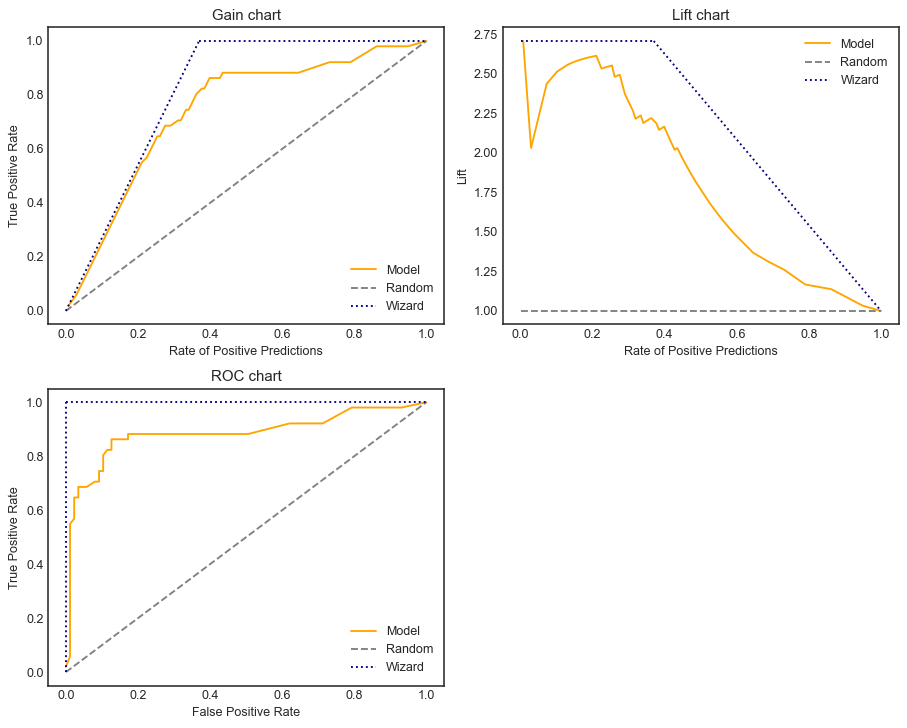

In [74]:
plt.rcParams['figure.figsize'] = [10, 8]
gain_lift_roc_plot(y_test, y_test_hat,"gain",1)
gain_lift_roc_plot(y_test, y_test_hat,"lift",2)
gain_lift_roc_plot(y_test, y_test_hat, "roc",3)

**ROC curve + AUC**

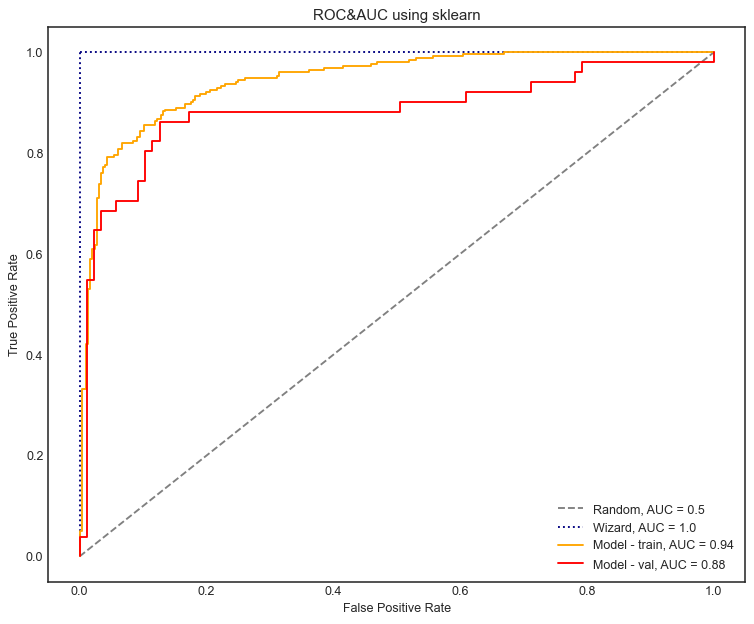

In [70]:
fprv, tprv, _ = roc_curve(y_test, y_test_hat)
fprt, tprt, _ = roc_curve(y_train, y_train_hat)
auc_rocv = auc(fprv, tprv)
auc_roct = auc(fprt, tprt)

plt.figure()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC&AUC using sklearn")

plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label = "Random, AUC = 0.5")
plt.plot([0, 0], [0, 1], color='navy', linestyle=':', label = "Wizard, AUC = 1.0")
plt.plot([0, 1], [1, 1], color='navy', linestyle=':')

plt.plot(fprt, tprt, color = 'orange', label='Model - train, AUC = %0.2f' % auc_roct)
plt.plot(fprv, tprv, color = 'red', label='Model - val, AUC = %0.2f' % auc_rocv)
plt.legend(loc="lower right");

ROC: na osi x odsetek fałszywie pozytywnych 1 - TN/(FN+TN); czyli 1 - specyficznosc <br>
na osi y recall czyli pełność; REC = TP / (TP + FN) <br>
AUC to obszar pod krzywą ROC

**Score-density plot**

In [71]:
def score_density_plot(y_test: pd.Series, y_test_hat: pd.Series):
    basis_x = np.linspace(-0.2,1.2,1000)
    y_test_hat_0 = np.array(y_test_hat[y_test == 0])
    y_test_hat_1 = np.array(y_test_hat[y_test == 1])
    wizard_0 = np.array(y_test[y_test == 0])
    wizard_1 = np.array(y_test[y_test == 1])
    avg = np.mean(y_test)
    ran = [1]
    for i in range(0,len(y_test)-1):
        ran = ran + [int(np.mean(ran) < avg)]
    ran = np.array(ran)
    random_0 = np.linspace(0,1.0,len(y_test))[ran==0]
    random_1 = np.linspace(0,1.0,len(y_test))[ran==1]
    res = []
    for m in [y_test_hat_0, y_test_hat_1, wizard_0, wizard_1, random_0, random_1]:
        kde = KernelDensity(kernel='epanechnikov', bandwidth=0.20)
        kde.fit(m[:, None])
        prob = np.exp(kde.score_samples(basis_x[:, None]))
        res.append(prob)
        
    plt.figure()
    plt.plot(basis_x, res[0], alpha=0.5, color = "orange", lw=2, label = "Model")
    plt.plot(basis_x, res[1], alpha=0.5, color = "orange", linestyle=":", lw=2)
    plt.plot(basis_x, res[2], alpha=0.5, color = "navy", label = "Wizard")
    plt.plot(basis_x, res[3], alpha=0.5, color = "navy", linestyle=":")
    plt.plot(basis_x, res[4], alpha=0.5, color = "grey", label = "Random")
    plt.plot(basis_x, res[5], alpha=0.5, color = "grey", linestyle=":")
    plt.title("Score density plot")
    plt.xlabel("Score")
    plt.ylabel("Density")
    plt.legend(loc = "upper center")

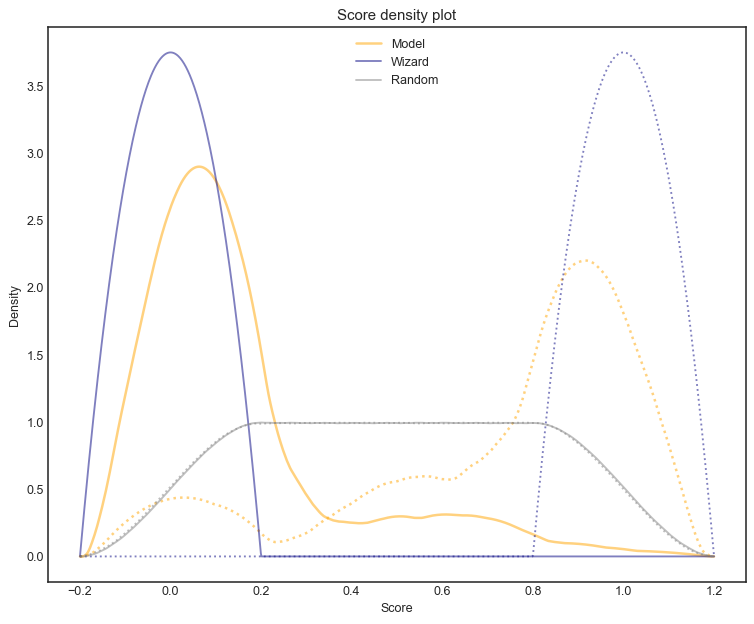

In [72]:
a = score_density_plot(y_test, y_test_hat)

## Exercises

Load Iris dataset from https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv to 'iris' DataFrame

In [90]:
url = "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"
iris = pd.read_csv(url, sep = ",", header = 0)

In [91]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Code `species` column to have value 1 if iris is from _versicolor_ species and 0 otherwise

In [92]:
iris['species'] = np.where(iris['species'] == 'versicolor', 1, 0)

In [96]:
iris['species']

0      0
1      0
2      0
3      0
4      0
      ..
145    0
146    0
147    0
148    0
149    0
Name: species, Length: 150, dtype: int32

Split dataset to train and validation subsets using `train_test_split` function. Training set should have **75%** of all observations.

In [97]:
X = iris.drop(['species'], axis=1)
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

Build logistic regression (with `LogisticRegression` from `sklearn`) using **Elastic-net** regularization with 0.35 L1 ratio (only one solver supports that, check [here](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression))

You can read more about **Elastic-net** [here](https://en.wikipedia.org/wiki/Elastic_net_regularization)

Make classification report with `classification_report`. What is accuracy of the model?

Why accuracy is so low? If you want to know check [here](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Unsupervised-learning-example:-Iris-dimensionality) below `In[19]`. Plot shows how target classes are distributed in 2D space (which was possible due to dimensionality reduction technique PCA - note that we have 4 predictors (sepal_length/width,petal_length/width) not 2). Remember we merged setosa and virginica species - knowing that look were versicolor is on the plot.

Write function 

`plot_acc_train_vs_val(y_train, y_test, y_train_hat, y_test_hat)` 

that takes following arguments:

- y_train - array of class labels (0 or 1) for training data
- y_test - array of class labels (0 or 1) for validation data 
- y_train_hat - array of probabilities (0 to 1) for class 1 for training data
- y_test_hat - array of probabilities (0 to 1) for class 1 for validation data

and produce plot like in **Finding optimal cut-off based on ACC** subsection but for both prediction on training and validation data. 

While creating function you _can_ use code as below:

```python
    acc_t = cutoff_analysis(y_train, y_train_hat)
    acc_v = ...
    plt.figure()
    plt.xlabel("Cutoff point")
    plt.ylabel("Accuracy")
    plt.title("Accuracy vs. cut-off")

    plt.plot(np.arange(0, 1.0, 0.01), acc_t)
    plt.plot(... , linestyle = ":")
    plt.plot([0, 1], [max(acc_t), max(acc_t)], color = 'gray', label = "Max ACC train= " + str(round(max(acc_t),3)) + 
             " for k = " + str(np.arange(0, 1.0, 0.01)[acc_t.index(max(acc_t))]))
    plt.plot(.....................................)
    plt.legend();
```

Then test your new function using (of course after filling placeholders):

```python
y_train_hat = model. ...
y_test_hat = model. ...
plot_acc_train_vs_val(y_train, y_test, y_train_hat, y_test_hat)
```

On the plot you may see that accuracy for train and validation sets prediction id quite similar. Shouldn't the accuracy be better on the training set prediction? In this case not necessarily becuase model is **underfitted** - in other words it's biased and may perform better on validation set.